<a href="https://colab.research.google.com/github/leeCodingStudio/Python_machine_learning/blob/master/11_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Clusters

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [53]:
X, y = make_blobs(n_samples=100, centers=3, random_state=10)

In [54]:
X = pd.DataFrame(X)
X

,0,1
0,-2.324963,-6.699996
1,0.518568,-4.900868
2,2.443018,3.846526
3,5.826623,-9.922593
4,2.033002,5.289908
...,...,...
95,-0.736931,-4.957402
96,2.790440,3.068621
97,4.486980,-10.074298
98,6.268638,-9.381380


In [55]:
y

array([2, 2, 1, 0, 1, 1, 0, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 1, 0, 1, 0, 2,
       1, 2, 0, 1, 1, 1, 1, 0, 2, 1, 1, 0, 2, 2, 2, 1, 1, 1, 2, 0, 2, 2,
       1, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 0,
       0, 2, 2, 2, 1, 0, 1, 1, 2, 1, 1, 2, 0, 0, 0, 1, 0, 1, 2, 1, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0])

<Axes: xlabel='0', ylabel='1'>

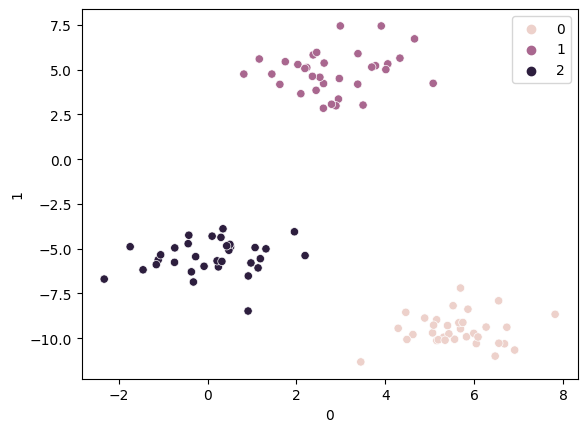

In [56]:
sns.scatterplot(x=X[0], y=X[1], hue=y)

In [57]:
from sklearn.cluster import KMeans

In [58]:
km = KMeans(n_clusters=3)

In [59]:
km.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [60]:
pred = km.predict(X)

<Axes: xlabel='0', ylabel='1'>

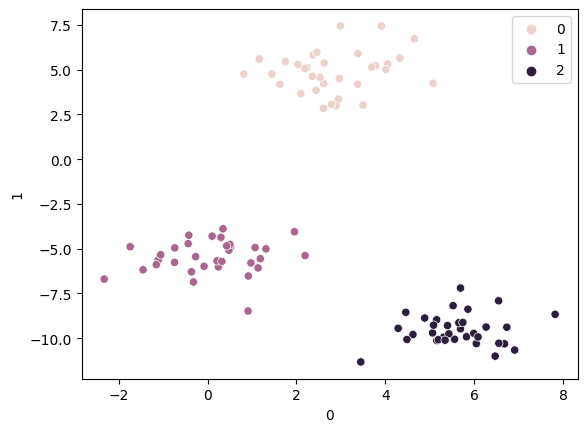

In [61]:
sns.scatterplot(x=X[0], y=X[1], hue=pred)

In [62]:
km = KMeans(n_clusters=4)

In [63]:
km.fit(X)
pred = km.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='0', ylabel='1'>

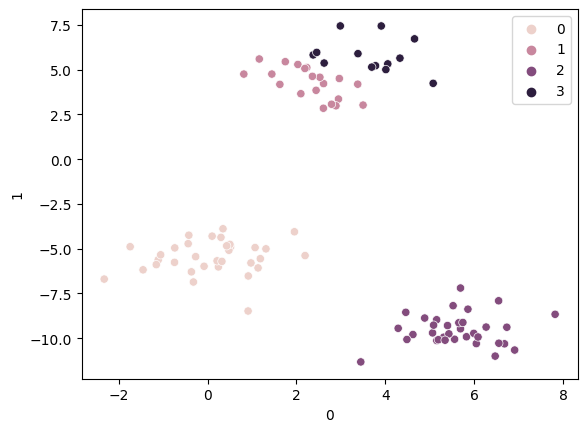

In [64]:
sns.scatterplot(x=X[0], y=X[1], hue=pred)

In [65]:
# 평가값, 하나의 ㅡㄹ러스터 안에 중심점으로부터 각각의 데이터 거리를 합한값
km.inertia_

154.07856318909234

In [66]:
inertia_list = []

for i in range(2, 11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    inertia_list.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [67]:
inertia_list

[976.8773336900748,
 186.3658862010144,
 154.07856318909234,
 130.46261058161912,
 112.75070923501222,
 97.26002092022821,
 85.32225080499938,
 73.44112432158697,
 64.85517121205642]

<Axes: >

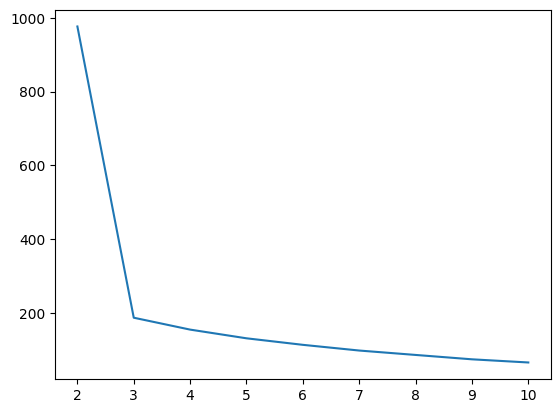

In [68]:
sns.lineplot(x=range(2, 11), y=inertia_list)
# 퍼짐 정도를 다합친값이 크면 너무 멀리 퍼졌다는 것이며 점점 너무 작아지면 가까운 것끼리 분류는 한것이므로 꺽이는 부분이 적절하다 판단 할 수 있다.

# 2. marketing 데이터셋 살펴보기

In [69]:
mkt_df = pd.read_csv('/content/drive/MyDrive/KDT/4. 머신러닝과 딥러닝/marketing.csv')

In [70]:
mkt_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0


In [71]:
pd.set_option('display.max_columns', 40)

In [72]:
mkt_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0


In [73]:
mkt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

(영어)   |   (한글)
:---:    |   :---:
ID | 고객 아이디
Year_Birth | 출생 연도
Education | 학력
Marital_Status | 결혼 여부
Income | 소득
Kidhome | 어린이 수
Teenhome | 청소년 수
Dt_Customer | 고객 등록일
Recency | 마지막 구매일로부터 경과일
MntWines | 와인 구매액
MntFruits | 과일 구매액
MntMeatProducts | 육류 제품 구매액
MntFishProducts | 어류 제품 구매액
MntSweetProducts | 단맛 제품 구매액
MntGoldProds | 골드 제품 구매액
NumDealsPurchases | 할인 행사 구매 수
NumWebPurchases | 웹에서의 구매 수
NumCatalogPurchases | 카탈로그에서의 구매 수
NumStorePurchases | 매장에서의 구매 수
NumWebVisitsMonth | 월별 웹 방문 수
Complain | 불만 여부

In [74]:
mkt_df.drop('ID', axis=1, inplace=True)

In [75]:
mkt_df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.009375
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.096391
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000


In [76]:
mkt_df.sort_values('Year_Birth')

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
239,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,5,7,0,2,1,1,0,2,4,0
339,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,562,104,64,224,1,4,6,4,1,0
192,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,8,7,4,25,1,2,1,2,5,1
1950,1940,PhD,Single,51141.0,0,0,08-07-2013,96,144,0,7,0,0,6,1,3,1,4,5,0
424,1941,PhD,Married,93027.0,0,0,13-04-2013,77,1285,42,716,55,0,21,0,7,10,5,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,1995,Graduation,Single,71163.0,0,0,09-03-2014,30,283,17,372,138,106,44,1,3,8,12,1,0
1850,1995,2n Cycle,Single,83257.0,0,0,18-09-2012,56,536,27,590,38,107,67,1,5,10,12,6,1
696,1995,Graduation,Single,34824.0,0,0,26-03-2014,65,4,2,11,2,0,4,1,1,0,2,6,0
1170,1996,Basic,Married,14421.0,0,0,17-02-2014,81,0,0,2,3,3,8,1,1,0,2,5,0


In [77]:
mkt_df = mkt_df[mkt_df['Year_Birth'] > 1900]

In [78]:
mkt_df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
count,2237.000000,2213.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,1968.901654,52236.581563,0.444345,0.506482,49.104604,303.995530,26.270451,166.916853,37.523022,27.068842,43.968708,2.326777,4.087170,2.662494,5.794367,5.319177,0.008941
std,11.701917,25178.603047,0.538467,0.544593,28.956073,336.574382,39.715972,225.661158,54.639909,41.293949,52.054318,1.932923,2.779461,2.923456,3.250940,2.426386,0.094152
min,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35246.000000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000
50%,1970.000000,51373.000000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000
75%,1977.000000,68487.000000,1.000000,1.000000,74.000000,504.000000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000


In [79]:
mkt_df.sort_values('Income', ascending=False)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
2233,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0
617,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,1,16,2,1,2,0,0,0,1,1,0
687,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,16,1622,17,3,4,15,0,28,1,0,0
1300,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,1,9,2,0,8,0,1,0,1,1,0
164,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,2,1582,1,2,1,15,0,22,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,1971,Graduation,Married,NaN,1,1,03-03-2013,82,71,1,16,0,0,9,4,2,1,3,8,0
2079,1954,Master,Together,NaN,0,1,23-06-2013,83,161,0,22,0,0,24,2,4,1,4,6,0
2081,1955,Graduation,Single,NaN,0,1,18-10-2013,95,264,0,21,12,6,147,3,6,1,5,7,0
2084,1943,Master,Widow,NaN,0,0,30-10-2013,75,532,126,490,164,126,126,1,5,5,11,1,0


In [80]:
# mkt_df = mkt_df[mkt_df['Income' < 20000]] # NaN이 저장되지 않음
mkt_df = mkt_df[mkt_df['Income'] != 666666]

In [81]:
mkt_df.sort_values('Income', ascending=False)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
617,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,1,16,2,1,2,0,0,0,1,1,0
687,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,16,1622,17,3,4,15,0,28,1,0,0
1300,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,1,9,2,0,8,0,1,0,1,1,0
164,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,2,1582,1,2,1,15,0,22,0,0,0
1653,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,1,0,1725,2,1,1,0,0,28,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,1971,Graduation,Married,NaN,1,1,03-03-2013,82,71,1,16,0,0,9,4,2,1,3,8,0
2079,1954,Master,Together,NaN,0,1,23-06-2013,83,161,0,22,0,0,24,2,4,1,4,6,0
2081,1955,Graduation,Single,NaN,0,1,18-10-2013,95,264,0,21,12,6,147,3,6,1,5,7,0
2084,1943,Master,Widow,NaN,0,0,30-10-2013,75,532,126,490,164,126,126,1,5,5,11,1,0


In [82]:
mkt_df = mkt_df.dropna()

In [83]:
mkt_df.isna().mean()

Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
Complain               0.0
dtype: float64

In [84]:
mkt_df['Dt_Customer'] = pd.to_datetime(mkt_df['Dt_Customer'])

<ipython-input-84-51c2edf49ec9>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  mkt_df['Dt_Customer'] = pd.to_datetime(mkt_df['Dt_Customer'])
<ipython-input-84-51c2edf49ec9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_df['Dt_Customer'] = pd.to_datetime(mkt_df['Dt_Customer'])


In [85]:
mkt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2212 non-null   int64         
 1   Education            2212 non-null   object        
 2   Marital_Status       2212 non-null   object        
 3   Income               2212 non-null   float64       
 4   Kidhome              2212 non-null   int64         
 5   Teenhome             2212 non-null   int64         
 6   Dt_Customer          2212 non-null   datetime64[ns]
 7   Recency              2212 non-null   int64         
 8   MntWines             2212 non-null   int64         
 9   MntFruits            2212 non-null   int64         
 10  MntMeatProducts      2212 non-null   int64         
 11  MntFishProducts      2212 non-null   int64         
 12  MntSweetProducts     2212 non-null   int64         
 13  MntGoldProds         2212 non-nul

In [86]:
# 마지막으로 가입된 사람을 기준으로 가입 날짜(달) 구하기
mkt_df['pass_month'] = (mkt_df['Dt_Customer'].max().year * 12 + mkt_df['Dt_Customer'].max().month) - (mkt_df['Dt_Customer'].dt.year * 12 + mkt_df['Dt_Customer'].dt.month)

<ipython-input-86-a658f77a331d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_df['pass_month'] = (mkt_df['Dt_Customer'].max().year * 12 + mkt_df['Dt_Customer'].max().month) - (mkt_df['Dt_Customer'].dt.year * 12 + mkt_df['Dt_Customer'].dt.month)


In [87]:
mkt_df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,pass_month
0,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,32
1,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,4
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,16
3,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,2
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,11


In [88]:
mkt_df.drop('Dt_Customer', axis=1, inplace=True)

<ipython-input-88-36e03d238c53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_df.drop('Dt_Customer', axis=1, inplace=True)


In [89]:
mkt_df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,pass_month
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,32
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,4
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,16
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,2
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,11


In [95]:
# mkt_df['Total_mnt'] = 와인, 과일, 육류, 어류, 단맛, 골드
mkt_df['Total_mnt'] = mkt_df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [96]:
# mkt_df['Children'] = 아이, 십대
mkt_df['Children'] = mkt_df[['Kidhome', 'Teenhome']].sum(axis=1)

In [97]:
mkt_df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,pass_month,Total_mnt,Children
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,32,1617,0
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,4,27,2
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,16,776,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,2,53,1
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,11,422,1


In [98]:
mkt_df.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)

In [99]:
mkt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2212 non-null   int64  
 1   Education            2212 non-null   object 
 2   Marital_Status       2212 non-null   object 
 3   Income               2212 non-null   float64
 4   Recency              2212 non-null   int64  
 5   MntWines             2212 non-null   int64  
 6   MntFruits            2212 non-null   int64  
 7   MntMeatProducts      2212 non-null   int64  
 8   MntFishProducts      2212 non-null   int64  
 9   MntSweetProducts     2212 non-null   int64  
 10  MntGoldProds         2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   i

In [100]:
mkt_df['Education'].value_counts()

Graduation    1115
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: Education, dtype: int64

In [101]:
mkt_df['Marital_Status'].value_counts()

Married     857
Together    571
Single      470
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [104]:
mkt_df['Marital_Status'] = mkt_df['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Single':'Single', 'Divorced':'Single', 'Widow':'Single', 'Alone':'Single', 'Absurd':'Single', 'YOLO':'Single'})

In [105]:
mkt_df['Marital_Status'].value_counts()

Partner    1428
Single      784
Name: Marital_Status, dtype: int64

In [106]:
mkt_df = pd.get_dummies(mkt_df, columns=['Education', 'Marital_Status'])

In [107]:
mkt_df.head()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,pass_month,Total_mnt,Children,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Partner,Marital_Status_Single
0,1957,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,32,1617,0,0,0,1,0,0,0,1
1,1954,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,4,27,2,0,0,1,0,0,0,1
2,1965,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,16,776,0,0,0,1,0,0,1,0
3,1984,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,2,53,1,0,0,1,0,0,1,0
4,1981,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,11,422,1,0,0,0,0,1,1,0


# 3. 스케일링(Scaling)
* 데이터를 특정한 스케일로 통일하는 것
* 데이터를 모델링하기 전에 거치는 것이 좋음
* 다차원의 값들을 비교 분석하기 쉽게 만들어주며, 자료의 오버플로우나 언더플로우를 방지하여 최적화 과정에서의 안정성 및 수렴 속도를 향상

### 3-1. 스케일링의 종류
* StandardScaler: 평균과 표준편차를 사용
* MinMaxScaler: 최대/최소값이 각각 1과 0이 되도록 스케일링
* RobustScaler: 중앙값과 IQR사용. 아웃라이어의 영향을 최소화

In [108]:
movie = {'naver':[2, 4, 6, 8, 10], 'netflix':[1, 2, 3, 4, 5]}

In [110]:
movie = pd.DataFrame(movie)
movie

,naver,netflix
0,2,1
1,4,2
2,6,3
3,8,4
4,10,5


In [111]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [112]:
min_max_scaler = MinMaxScaler()

In [113]:
min_max_movie = min_max_scaler.fit_transform(movie)

In [114]:
pd.DataFrame(min_max_movie, columns=['Naver', 'NetFlix'])

,Naver,NetFlix
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00


### 3-2. 스케일링 적용하기

In [115]:
ss = StandardScaler()

In [116]:
ss.fit_transform(mkt_df)

array([[-1.01835202,  0.28710487,  0.31035323, ..., -0.52643733,
        -1.34960312,  1.34960312],
       [-1.27478522, -0.26088203, -0.38081349, ..., -0.52643733,
        -1.34960312,  1.34960312],
       [-0.33453017,  0.9131964 , -0.79551352, ..., -0.52643733,
         0.74095857, -0.74095857],
       ...,
       [ 1.03311355,  0.23334696,  1.45077832, ..., -0.52643733,
        -1.34960312,  1.34960312],
       [-1.10382975,  0.80317156, -1.41756357, ..., -0.52643733,
         0.74095857, -0.74095857],
       [-1.27478522,  0.04229031, -0.31169682, ...,  1.89956135,
         0.74095857, -0.74095857]])

In [117]:
pd.DataFrame(ss.fit_transform(mkt_df))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,-1.018352,0.287105,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,-0.09552,1.936840,1.676245,-1.264598,-0.313547,-0.158187,0.991895,-0.444542,-0.526437,-1.349603,1.349603
1,-1.274785,-0.260882,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,-0.09552,-1.714136,-0.963297,1.404572,-0.313547,-0.158187,0.991895,-0.444542,-0.526437,-1.349603,1.349603
2,-0.334530,0.913196,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,-0.09552,-0.149432,0.280110,-1.264598,-0.313547,-0.158187,0.991895,-0.444542,-0.526437,0.740959,-0.740959
3,1.289547,-1.176114,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-0.09552,-1.974920,-0.920135,0.069987,-0.313547,-0.158187,0.991895,-0.444542,-0.526437,0.740959,-0.740959
4,1.033114,0.294307,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,-0.09552,-0.801392,-0.307562,0.069987,-0.313547,-0.158187,-1.008171,-0.444542,1.899561,0.740959,-0.740959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,-0.163575,0.430444,-0.104347,1.197084,0.419540,0.066770,0.079461,2.213965,3.928291,-0.168701,1.791619,0.111982,-0.555814,-0.132545,-0.09552,0.111352,1.218061,0.069987,-0.313547,-0.158187,0.991895,-0.444542,-0.526437,0.740959,-0.740959
2208,-1.958607,0.560123,0.241237,0.298631,-0.662628,-0.611184,-0.687527,-0.658360,-0.694954,2.429954,1.426865,-0.229679,-0.248141,0.692181,-0.09552,-1.974920,-0.271040,2.739158,-0.313547,-0.158187,-1.008171,-0.444542,1.899561,0.740959,-0.740959
2209,1.033114,0.233347,1.450778,1.787156,0.545373,0.222878,-0.103155,-0.366260,-0.385448,-0.688432,-0.761665,0.111982,2.213242,0.279818,-0.09552,-0.801392,1.052052,-1.264598,-0.313547,-0.158187,0.991895,-0.444542,-0.526437,-1.349603,1.349603
2210,-1.103830,0.803172,-1.417564,0.363866,0.092373,0.209498,0.773403,0.071892,0.330284,-0.168701,0.697355,0.795303,1.290224,-0.957271,-0.09552,-0.801392,0.391336,0.069987,-0.313547,-0.158187,-1.008171,2.249505,-0.526437,0.740959,-0.740959


In [119]:
ss_df = pd.DataFrame(ss.fit_transform(mkt_df), columns=mkt_df.columns)

In [120]:
ss_df

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,pass_month,Total_mnt,Children,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Partner,Marital_Status_Single
0,-1.018352,0.287105,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,-0.09552,1.936840,1.676245,-1.264598,-0.313547,-0.158187,0.991895,-0.444542,-0.526437,-1.349603,1.349603
1,-1.274785,-0.260882,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,-0.09552,-1.714136,-0.963297,1.404572,-0.313547,-0.158187,0.991895,-0.444542,-0.526437,-1.349603,1.349603
2,-0.334530,0.913196,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,-0.09552,-0.149432,0.280110,-1.264598,-0.313547,-0.158187,0.991895,-0.444542,-0.526437,0.740959,-0.740959
3,1.289547,-1.176114,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-0.09552,-1.974920,-0.920135,0.069987,-0.313547,-0.158187,0.991895,-0.444542,-0.526437,0.740959,-0.740959
4,1.033114,0.294307,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,-0.09552,-0.801392,-0.307562,0.069987,-0.313547,-0.158187,-1.008171,-0.444542,1.899561,0.740959,-0.740959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,-0.163575,0.430444,-0.104347,1.197084,0.419540,0.066770,0.079461,2.213965,3.928291,-0.168701,1.791619,0.111982,-0.555814,-0.132545,-0.09552,0.111352,1.218061,0.069987,-0.313547,-0.158187,0.991895,-0.444542,-0.526437,0.740959,-0.740959
2208,-1.958607,0.560123,0.241237,0.298631,-0.662628,-0.611184,-0.687527,-0.658360,-0.694954,2.429954,1.426865,-0.229679,-0.248141,0.692181,-0.09552,-1.974920,-0.271040,2.739158,-0.313547,-0.158187,-1.008171,-0.444542,1.899561,0.740959,-0.740959
2209,1.033114,0.233347,1.450778,1.787156,0.545373,0.222878,-0.103155,-0.366260,-0.385448,-0.688432,-0.761665,0.111982,2.213242,0.279818,-0.09552,-0.801392,1.052052,-1.264598,-0.313547,-0.158187,0.991895,-0.444542,-0.526437,-1.349603,1.349603
2210,-1.103830,0.803172,-1.417564,0.363866,0.092373,0.209498,0.773403,0.071892,0.330284,-0.168701,0.697355,0.795303,1.290224,-0.957271,-0.09552,-0.801392,0.391336,0.069987,-0.313547,-0.158187,-1.008171,2.249505,-0.526437,0.740959,-0.740959


In [121]:
rs = RobustScaler()

In [123]:
rs_df = pd.DataFrame(rs.fit_transform(mkt_df), columns=mkt_df.columns)

In [124]:
rs_df

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,pass_month,Total_mnt,Children,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Partner,Marital_Status_Single
0,-0.722222,0.203497,0.18,0.955301,2.580645,2.210405,3.404255,2.50000,1.351064,0.5,1.00,2.00,-0.2,0.25,0.0,1.363636,1.246170,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
1,-0.888889,-0.151172,-0.22,-0.341996,-0.225806,-0.286705,-0.212766,-0.21875,-0.393617,0.0,-0.75,-0.25,-0.6,-0.25,0.0,-1.181818,-0.377937,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
2,-0.277778,0.608718,-0.46,0.520790,1.322581,0.272832,2.106383,0.40625,0.372340,-0.5,1.00,0.00,1.0,-0.50,0.0,-0.090909,0.387130,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.777778,-0.743531,-0.46,-0.341996,-0.129032,-0.221965,-0.042553,-0.15625,-0.414894,0.0,-0.50,-0.50,-0.2,0.00,0.0,-1.363636,-0.351379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.611111,0.208159,0.90,-0.005198,1.129032,0.231214,0.723404,0.59375,-0.202128,1.5,0.25,0.25,0.2,-0.25,0.0,-0.545455,0.025536,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,-0.166667,0.296270,-0.06,1.109148,1.129032,0.527168,0.638298,3.43750,4.734043,0.0,1.25,0.25,-0.2,-0.25,0.0,0.090909,0.964249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2208,-1.333333,0.380201,0.14,0.479210,-0.258065,-0.175723,-0.255319,-0.25000,-0.351064,2.5,1.00,0.00,0.0,0.25,0.0,-1.363636,0.048008,2.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0
2209,0.611111,0.168704,0.84,1.522869,1.290323,0.689017,0.425532,0.12500,-0.010638,-0.5,-0.50,0.25,1.6,0.00,0.0,-0.545455,0.862104,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
2210,-0.777778,0.537507,-0.82,0.524948,0.709677,0.675145,1.446809,0.68750,0.776596,0.0,0.50,0.75,1.0,-0.75,0.0,-0.545455,0.455567,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0


In [125]:
mm = MinMaxScaler()

In [128]:
mm_df = pd.DataFrame(mm.fit_transform(mkt_df), columns=mkt_df.columns)

In [129]:
mm_df

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,pass_month,Total_mnt,Children,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Partner,Marital_Status_Single
0,0.303571,0.351086,0.585859,0.425318,0.442211,0.316522,0.664093,0.335878,0.274143,0.200000,0.296296,0.357143,0.307692,0.35,0.0,0.914286,0.639683,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.250000,0.277680,0.383838,0.007368,0.005025,0.003478,0.007722,0.003817,0.018692,0.133333,0.037037,0.035714,0.153846,0.25,0.0,0.114286,0.008730,0.666667,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.446429,0.434956,0.262626,0.285332,0.246231,0.073623,0.428571,0.080153,0.130841,0.066667,0.296296,0.071429,0.769231,0.20,0.0,0.457143,0.305952,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.785714,0.155079,0.262626,0.007368,0.020101,0.011594,0.038610,0.011450,0.015576,0.133333,0.074074,0.000000,0.307692,0.30,0.0,0.057143,0.019048,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.732143,0.352051,0.949495,0.115874,0.216080,0.068406,0.177606,0.103053,0.046729,0.333333,0.185185,0.107143,0.461538,0.25,0.0,0.314286,0.165476,0.333333,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,0.482143,0.370288,0.464646,0.474883,0.216080,0.105507,0.162162,0.450382,0.769470,0.133333,0.333333,0.107143,0.307692,0.25,0.0,0.514286,0.530159,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2208,0.107143,0.387659,0.565657,0.271936,0.000000,0.017391,0.000000,0.000000,0.024922,0.466667,0.296296,0.071429,0.384615,0.35,0.0,0.057143,0.174206,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2209,0.732143,0.343885,0.919192,0.608171,0.241206,0.125797,0.123552,0.045802,0.074766,0.066667,0.074074,0.107143,1.000000,0.30,0.0,0.314286,0.490476,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2210,0.285714,0.420217,0.080808,0.286671,0.150754,0.124058,0.308880,0.114504,0.190031,0.133333,0.222222,0.178571,0.769231,0.15,0.0,0.314286,0.332540,0.333333,0.0,0.0,0.0,1.0,0.0,1.0,0.0


# 4. KMeans
* KMeans 클러스터링 알고리즘은 n개의 중심점을 찍은 후에, 이 중심점에서 각 점간의 거리의 합이 가장 최소화가 되는 중심점 n의 위치를 찾고, 이 중심점에서 가까운 점들을 중심점을 기준으로 묶는 알고리즘
* 중심점은 각 군집의 데이터의 평균값을 위치로 가지게 됨
* 클러스터의 수를 정해줘야 함
* 중심점을 측정할 때 처음에 랜덤으로 중심점의 위치를 찾기 때문에 잘못하면 중심점의 점간의 거리가 Global optimum에 수렴하여 잘못된 분류를 할 수 있음

In [130]:
inertia_list = []

for i in range(2, 11):
    km = KMeans(n_clusters=i, random_state=10)
    km.fit(mm_df)
    inertia_list.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<Axes: >

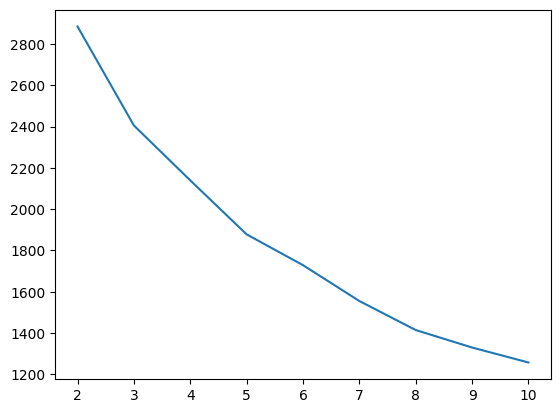

In [131]:
sns.lineplot(x=range(2, 11), y=inertia_list)

# 5. 실루엣 스코어
* 각 군집 간의 얼마나 효율적으로 분리 돼있는지를 나타냄
* 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 의미
* 실루엣 분석은 실루엣 계수를 기반으로 하는데, 실루엣 계수는 개별 데이터가 가지는 군집화 지표

In [132]:
from sklearn.metrics import silhouette_score

In [151]:
score = []
for i in range(2,11):
    km = KMeans(n_clusters=i,random_state=10)
    km.fit(mm_df)
    pred = km.predict(mm_df)
    score.append(silhouette_score(mm_df,pred))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [152]:
score

[0.27069493833875846,
 0.24864017540307504,
 0.2720374467213452,
 0.3169512485472221,
 0.2687842581624041,
 0.3023437795916352,
 0.32784071353619376,
 0.3103663650975524,
 0.32666800120305484]

<Axes: >

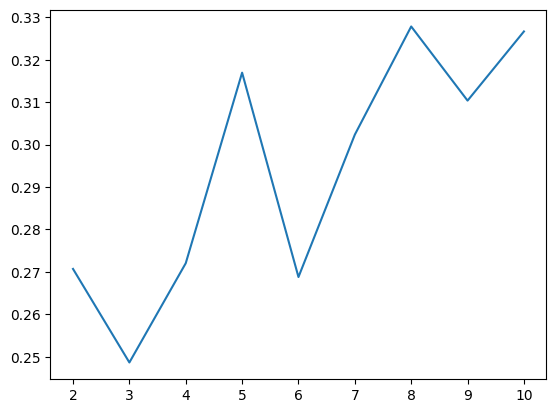

In [153]:
sns.lineplot(x=range(2, 11), y=score)

In [137]:
km = KMeans(n_clusters=8, random_state=10)

In [138]:
km.fit(mm_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(random_state=10)

In [139]:
pred = km.predict(mm_df)

In [140]:
pred

array([2, 2, 7, ..., 2, 5, 3], dtype=int32)

In [145]:
mkt_df['label'] = pred

In [146]:
mkt_df

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,pass_month,Total_mnt,Children,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Partner,Marital_Status_Single,label
0,1957,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,32,1617,0,0,0,1,0,0,0,1,1
1,1954,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,4,27,2,0,0,1,0,0,0,1,6
2,1965,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,16,776,0,0,0,1,0,0,1,0,8
3,1984,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,2,53,1,0,0,1,0,0,1,0,0
4,1981,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,11,422,1,0,0,0,0,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,0,18,1341,1,0,0,1,0,0,1,0,8
2236,1946,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,0,2,444,3,0,0,0,0,1,1,0,3
2237,1981,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,0,11,1241,0,0,0,1,0,0,0,1,1
2238,1956,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,0,11,843,1,0,0,0,1,0,1,0,5


In [147]:
mkt_df['label'].value_counts()

0    458
3    305
8    288
6    257
5    240
2    175
1    165
7    137
9    125
4     62
Name: label, dtype: int64